In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
plt.style.use('seaborn')

##  Reading the data and removing the coulumns which wouldnt help us predict whether how healthy is a specific cereal
* manufacturer 
* name
* surprisingly vitamins they dont seem to contribute that much because here vitamins just list the vitamins present which could be non essential vitamins and in trace amounts)

In [2]:
cereals = pd.read_csv('cereal.csv')
cereals.drop(['shelf','name','mfr','type','vitamins'],axis =1,inplace=True)

In [3]:
cereals

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups,target
0,50,4,0,140,14.0,8.0,0,330,1.00,0.50,93.704912
1,90,3,0,0,4.0,19.0,0,140,1.00,0.67,74.472949
2,90,3,0,0,3.0,20.0,0,120,1.00,0.67,72.801787
3,70,4,1,130,10.0,5.0,6,280,1.00,0.33,68.402973
4,80,2,0,0,3.0,16.0,0,95,0.83,1.00,68.235885
...,...,...,...,...,...,...,...,...,...,...,...
72,110,1,1,180,0.0,12.0,13,55,1.00,1.00,22.736446
73,110,1,1,180,0.0,12.0,13,65,1.00,1.00,22.396513
74,120,1,2,220,1.0,12.0,11,45,1.00,1.00,21.871292
75,120,1,3,210,0.0,13.0,9,45,1.00,0.75,19.823573


## calculating the ratio of macronutrients like protein and fat and seeing how much of carb is actually fibre and calculating the amount of nutrition value per cal
* protein ratio is by weight ratio of cereal for 1 serving or 28 grams how much proteins doesit have
* fibre ratio is how much of carbohydrate is actually fibre a.k.a fibre/carbo where fibre and carbo both are in grams
* fat ratio is ratio of calories contributed by fat and total calories
* so we could say the nutrious part of food is protein and fibre protein helps retain muscle and normally bodily functions and fibre is essential for smooth bowel moments fats are nutrious as well but the fat in cereals is 9 on 10 times a cheap vegetabale oil or hydrogenated oil which is not nutrious and more harmful to body
* so we would consider the ratio of calories from protein(each gram of protein has around 4 cal) and calories from fibre(each gram of fibre has around 2 cal) divided by total cal 

In [4]:
cereals['protein ratio'] = cereals['protein']/(cereals['weight']*28)

In [5]:
cereals['fiber ratio'] = cereals['fiber']/cereals['carbo']
cereals['fat ratio'] = cereals['fat']*9/(cereals['calories'])
cereals['nutrition per cal'] = ((cereals['protein']*4)+(cereals['fiber']*2))/cereals['calories']
cereals.drop(['calories','protein','fat','fiber','weight','cups'],axis=1,inplace=True)
cereals

,sodium,carbo,sugars,potass,target,protein ratio,fiber ratio,fat ratio,nutrition per cal
0,140,8.0,0,330,93.704912,0.142857,1.750000,0.000000,0.880000
1,0,19.0,0,140,74.472949,0.107143,0.210526,0.000000,0.222222
2,0,20.0,0,120,72.801787,0.107143,0.150000,0.000000,0.200000
3,130,5.0,6,280,68.402973,0.142857,2.000000,0.128571,0.514286
4,0,16.0,0,95,68.235885,0.086059,0.187500,0.000000,0.175000
...,...,...,...,...,...,...,...,...,...
72,180,12.0,13,55,22.736446,0.035714,0.000000,0.081818,0.036364
73,180,12.0,13,65,22.396513,0.035714,0.000000,0.081818,0.036364
74,220,12.0,11,45,21.871292,0.035714,0.083333,0.150000,0.050000
75,210,13.0,9,45,19.823573,0.035714,0.000000,0.225000,0.033333


In [6]:
cereals

,sodium,carbo,sugars,potass,target,protein ratio,fiber ratio,fat ratio,nutrition per cal
0,140,8.0,0,330,93.704912,0.142857,1.750000,0.000000,0.880000
1,0,19.0,0,140,74.472949,0.107143,0.210526,0.000000,0.222222
2,0,20.0,0,120,72.801787,0.107143,0.150000,0.000000,0.200000
3,130,5.0,6,280,68.402973,0.142857,2.000000,0.128571,0.514286
4,0,16.0,0,95,68.235885,0.086059,0.187500,0.000000,0.175000
...,...,...,...,...,...,...,...,...,...
72,180,12.0,13,55,22.736446,0.035714,0.000000,0.081818,0.036364
73,180,12.0,13,65,22.396513,0.035714,0.000000,0.081818,0.036364
74,220,12.0,11,45,21.871292,0.035714,0.083333,0.150000,0.050000
75,210,13.0,9,45,19.823573,0.035714,0.000000,0.225000,0.033333


## So here we check some distribution to validate our common sense that there are not alot of healthy cereal options in the market 

## This a distrubution of nutrition per cal as you can see the majority of the products in sample space have less than 30% of actual nutritional value(a.k.a proteins and fibre)

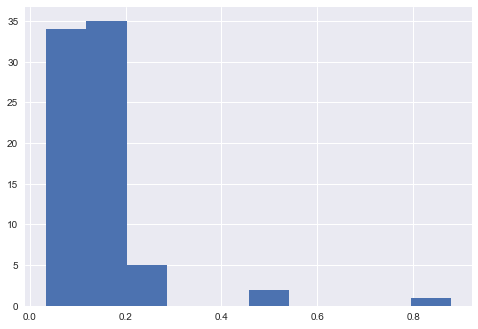

In [7]:
cereals['nutrition per cal'].hist();

## The story remains the same around 40 samples out of 80 have protein percentage of less then 8% and only few have around 20% protein in them which again wouldnt be of high quality but better than rest

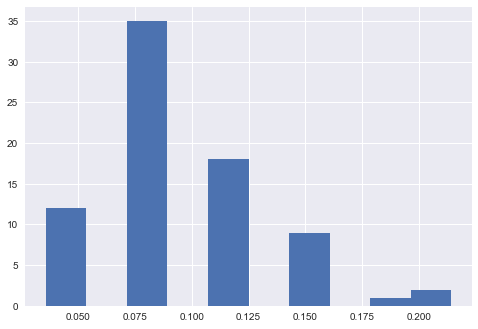

In [8]:
cereals['protein ratio'].hist();

## So as you can see only 5 cereals have 1 to 1 or more ratio of fibre to carb because in all othe cereals almost all of these carbs comes in the form of added sugar 

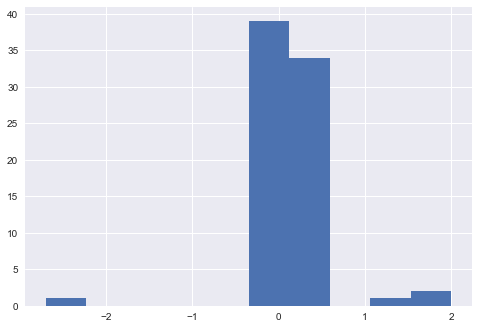

In [9]:
cereals['fiber ratio'].hist()

## fat is not that big of issue in cereals as most companies try to make their cereals look "healthy" but I added this feature so the model could generallize well and give you a semi decent accurate of how bad other deep fried savoury food could be

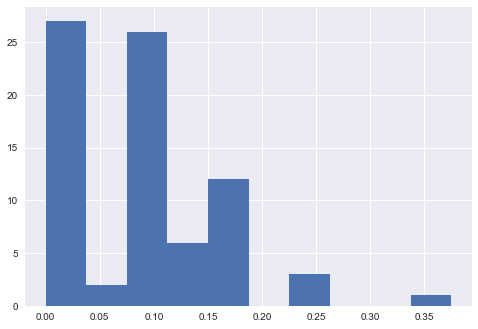

In [10]:
cereals['fat ratio'].hist();

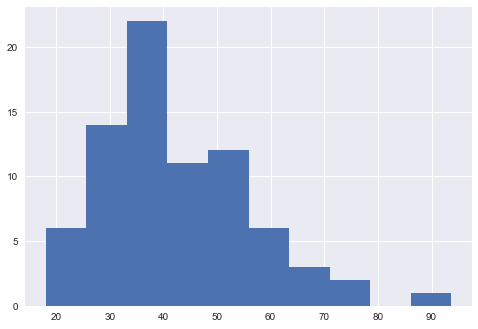

In [11]:
cereals['target'].hist()

##  lets check co-reation between aur feature which we extracted from existing data

In [12]:
cereals[cereals.columns[1:]].corr()['target'][:]

carbo                0.052055
sugars              -0.759675
potass               0.380165
target               1.000000
protein ratio        0.579989
fiber ratio          0.311678
fat ratio           -0.363886
nutrition per cal    0.725456
Name: target, dtype: float64

## so two of most higly co-related features are nutrition per cal and sugar no doubts here nutrition per cal is positive high correlation i.e if a product has high nutrition per cal the model will predict target value high as well and sugar is negative high correlation i.e if sugar in a cereal increases the model predicts target value low

## Just validiating from scatter plots the correlation between our features and target 

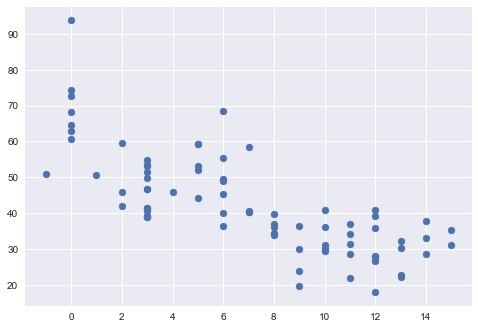

In [20]:
fig,ax =plt.subplots()
ax.scatter(x= cereals['sugars'],y= cereals['target'])

## looks like the correlation does exist and we can  move ahead to plotting and from scatter plot it looks like linear regression could do well as we can fit a straight line that rough tarces our data points  

In [14]:
from sklearn.model_selection import train_test_split
x = cereals.drop('target',axis=1)
y = cereals['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## from below results we could say our model is pretty good with around 0.9 r^2 score and mean absolute error ranging from 0.5 to 9 where 9 occurred only once in 20 cv otherwise mae stayed in betweem 0-4

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.9597776409401014

In [31]:
from sklearn.metrics import mean_absolute_error
y_preds = reg.predict(x_test)
mse = mean_absolute_error(y_test,y_preds)
mse

2.226160502784332

In [32]:
from sklearn.model_selection import cross_val_score 
cross_val_score(reg,x,y,cv=20,scoring='neg_mean_absolute_error',verbose=2,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


array([-9.57733755, -2.70685467, -1.70368713, -1.76855995, -3.06215952,
       -3.18632009, -1.26632185, -2.18360796, -2.57991678, -1.12728525,
       -1.30754722, -2.79156919, -2.10057217, -2.44367984, -2.05837677,
       -1.96248517, -2.89302406, -0.61808474, -1.69905765, -1.86642399])

## so now just to to verify if the model would generalize well on foods which are not cereals here we pass it nutritional facts for a samosa(a deep fried indian snack) so lets see what score does it predict 

In [17]:
reg.predict([[220,8.96,0.35,52,0.03,0.05,0.52,0.071],
             [220,8.96,0.35,52,0.03,0.05,0.52,0.071]])

array([20.92877701, 20.92877701])

##  no doubt among the worst health scores in the dataset so we could conclude that this model generalizes well for not only cereals but other foods as well